In [99]:
# Import the packages and classes needed for this example:
import matplotlib.pyplot as plt
import numpy as np
import torch
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [100]:
from sklearn.utils import shuffle
# Load data, and plot it with matplotlib:

file = open("winequality-red.csv")
csvreader = csv.reader(file)
header = next(csvreader)
#print(header)

X, y = [], []
for row in csvreader:
  y.append(row.pop(-1))
  X.append(row)
file.close()

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

# for i in range(len(X_train[0])): # number of features
#   X_feature = [features[i] for features in X_train]

#   plt.title(f"{header[i]}")
#   plt.xlabel("x")
#   plt.ylabel("y")
#   plt.scatter(X_feature, y_train);
#   plt.show()

In [101]:
# Create a linear regression model based the positioning of the data and Intercept, and predict a Best Fit:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train);

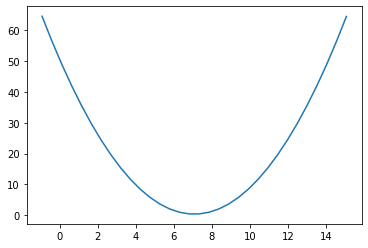

In [102]:
# Calculating mse of each intercept in the interval (intercept +- delta)
delta = 8
intercept_base = model.intercept_
intercept_variance = np.linspace(intercept_base-delta, intercept_base+delta, num=32)

mse_values = []
for intercept in intercept_variance:
  model.intercept_ = intercept
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  mse_values.append(mse)

mse_values = torch.tensor(mse_values)

plt.plot(intercept_variance, mse_values);
plt.show()